In [105]:
from datetime import datetime
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret
from matplotlib import style
style.use('ggplot')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [106]:
news_outlets = ["@BBC", '@CBS', '@CNN', '@FoxNews', '@NYTimes']

n_tweets = 10

sentiment = []
compound_list = []
name = []
counter_list = []
overall_compound =[]
overall_outlet = []

for outlet in news_outlets:
    overall_list = []
    overall_name = ''
    counter = 0
    for status in tweepy.Cursor(api.user_timeline, id=outlet, tweet_mode="extended").items(n_tweets):
        tweet = status._json
        result = analyzer.polarity_scores(tweet['full_text'])
        #get name, counter and compound scores
        name.append(tweet['user']['name'])
        compound_list.append(result['compound'])
        counter += 1
        counter_list.append(counter)        
        #get overall name and compound score to mean
        overall_list.append(result['compound'])
        overall_name = tweet['user']['name']
    overall_compound.append(np.mean(overall_list))
    overall_outlet.append(overall_name)
    
sentiment.append({
    "name": name,
    "compound_score" : compound_list,
    "counter":counter
    })


In [101]:
# counter_list

In [107]:
overall_df = pd.DataFrame({
    "News Outlet": overall_outlet,
    "Compound Score" : overall_compound,
    })
overall_df

,Compound Score,News Outlet
0,0.12283,BBC
1,0.37825,CBS
2,-0.10897,CNN
3,-0.22715,Fox News
4,-0.22433,The New York Times


In [86]:
# compound_list

In [120]:
sentiment_df = pd.DataFrame({
    "name": name,
    "compound_score" : compound_list,
    "counter":counter
    })
# sentiment_df.head(50)
# sentiment_df.columns

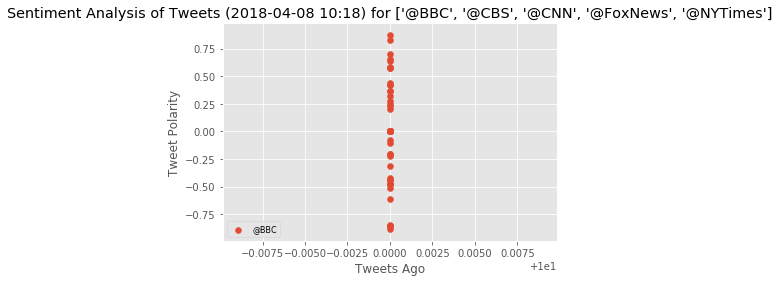

In [118]:
plt.scatter(sentiment_df['counter'], sentiment_df['compound_score'])
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_outlets}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.legend(('@BBC', '@CBS', '@CNN', '@FoxNews', '@NYTimes'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

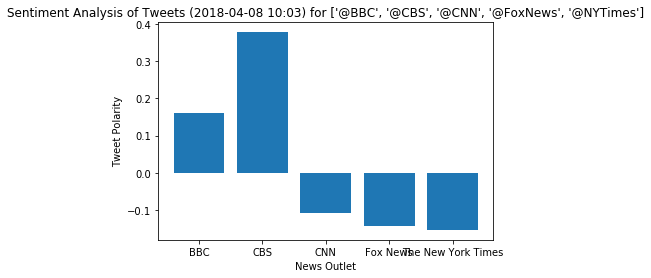

In [99]:
plt.bar(overall_df['News Outlet'], overall_df['Compound Score'])

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_outlets}")
plt.ylabel("Tweet Polarity")
plt.xlabel("News Outlet")
plt.show()